In [31]:
import pandas as pd
from helpers.idf_helpers import *
from helpers.plot_helpers import *
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from eppy.modeleditor import IDF
from IPython.display import display

import os

para ver como manipular fechas en time series:

https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

Estudios:

1. la casita sola
2. la casita con solo con aire acondicionado continuo
3. la casita solo con gente
4. la casita con gente y aire acondicionado continuo
5. la casita con luces gente y aure acondicionado continuo (lo normal)
6. la casita con luces gente y aire acondicionado según ocupación.

Por úlyimo compara 5 y 6

In [32]:
winterperiod = ['2000-01-08','2000-01-10']
summerperiod= ['2000-08-08','2000-08-10']

In [67]:
title1 = 'walls'
title2 = 'walls, HVAC'
title3 = 'walls - people'
title3_1 = 'walls - people,lights,EE'
title4 = 'walls, const HVAC  - people'
title5 = 'walls, const HVAC - people,lights,EE'
title6 =  'walls, sched HVAC - people,lights,EE'

----------------------------------

__TemperatureStudy1__:

- PEOPLE: NO
- LIGHTS: NO
- ELECTRICEQUIPMENT: NO
- AIRCONDITIONER: NO


In [34]:
data1 = eso_to_ts('studies/TemperatureStudy1/eplusout.csv')

idffile = 'studies/TemperatureStudy1/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf1 = initialization(idffile, iddfile, epwfile)
@interact
def show_not_null_classes(classes = notnullobj(idf1)):
    return epobject_to_df(idf1.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

------------------------

__TemperatureStudy2__:

- PEOPLE: NO
- LIGHTS: NO
- ELECTRICEQUIPMENT: NO
- AIRCONDITIONER: SÍ
  - DATOS:
              key 	HVACTemplate:Thermostat
              Name 	thermostat 1
              Heating_Setpoint_Schedule_Name 	Always On Continuous
              Constant_Heating_Setpoint 	15
              Cooling_Setpoint_Schedule_Name 	
              Constant_Cooling_Setpoint 	25


<AxesSubplot:title={'center':'funcionamiento del sistema de refrigeración'}, xlabel='Date/Time'>

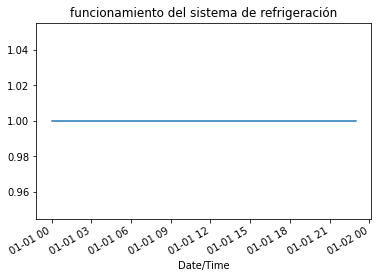

In [35]:
data2 = eso_to_ts('/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/studies/TemperatureStudy2/eplusout.csv')
idffile = 'studies/TemperatureStudy2/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf2 = initialization(idffile, iddfile, epwfile)
data2['2000-01-01'].iloc[:,2].plot(title = 'funcionamiento del sistema de refrigeración')

In [36]:
@interact
def show_not_null_classes(classes = notnullobj(idf2)):
    return epobject_to_df(idf2.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

----------------------------

__TemperatureStudy3__:

- PEOPLE: SÍ
- LIGHTS: NO
- ELECTRICEQUIPMENT: NO
- AIRCONDITIONER: NO


In [37]:
data3 = eso_to_ts('studies/TemperatureStudy3/eplusout.csv')
idffile = 'studies/TemperatureStudy3/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf3 = initialization(idffile, iddfile, epwfile)
@interact
def show_not_null_classes(classes = notnullobj(idf3)):
    return epobject_to_df(idf3.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

__TemperatureStudy3.1__:

- PEOPLE: SÍ
- LIGHTS: SÍ
- ELECTRICEQUIPMENT: SÍ
- AIRCONDITIONER: NO

In [65]:
data3_1 = eso_to_ts('studies/TemperatureStudy3_1/eplusout.csv')
idffile = 'studies/TemperatureStudy3/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf3_1 = initialization(idffile, iddfile, epwfile)
@interact
def show_not_null_classes(classes = notnullobj(idf3_1)):
    return epobject_to_df(idf3_1.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

---------------------------

__TemperatureStudy4__:

- PEOPLE: SÍ
- LIGHTS: NO
- ELECTRICEQUIPMENT: NO
- AIRCONDITIONER: SÍ
  - DATOS:
              key 	HVACTemplate:Thermostat
              Name 	thermostat 1
              Heating_Setpoint_Schedule_Name 	Always On Continuous
              Constant_Heating_Setpoint 	15
              Cooling_Setpoint_Schedule_Name 	
              Constant_Cooling_Setpoint 	25

In [38]:
idffile = 'studies/TemperatureStudy4/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf4 = initialization(idffile,iddfile,epwfile)
data4 = eso_to_ts('studies/TemperatureStudy4/eplusout.csv')

In [39]:
@interact
def show_not_null_classes(classes = notnullobj(idf4)):
    return epobject_to_df(idf4.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

__TemperatureStudy5__:

- PEOPLE: SÍ
- LIGHTS: SÍ
- ELECTRICEQUIPMENT: SÍ
- AIRCONDITIONER: SÍ
  - DATOS:
              key 	HVACTemplate:Thermostat
              Name 	thermostat 1
              Heating_Setpoint_Schedule_Name 	Always On Continuous
              Constant_Heating_Setpoint 	15
              Cooling_Setpoint_Schedule_Name 	
              Constant_Cooling_Setpoint 	25

In [40]:
idffile = 'studies/TemperatureStudy5/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf5 = initialization(idffile,iddfile,epwfile)
data5 = eso_to_ts('studies/TemperatureStudy5/eplusout.csv')

In [41]:
@interact
def show_not_null_classes(classes = notnullobj(idf5)):
    return epobject_to_df(idf5.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

--------------------------

_TemperatureStudy6__:

- PEOPLE: SÍ
- LIGHTS: SÍ
- ELECTRICEQUIPMENT: SÍ
- AIRCONDITIONER: SÍ (Scheduled)

In [42]:
idffile = 'studies/TemperatureStudy6/idffile.idf'
iddfile = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
epwfile = '/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/input/Wheather file/FRA_Paris.Orly.071490_IWEC.epw'
idf6 = initialization(idffile,iddfile,epwfile)
data6 = eso_to_ts('studies/TemperatureStudy6/eplusout.csv')

In [43]:
@interact
def show_not_null_classes(classes = notnullobj(idf6)):
    return epobject_to_df(idf6.idfobjects[classes])

interactive(children=(Dropdown(description='classes', options=('VERSION', 'SIMULATIONCONTROL', 'BUILDING', 'TI…

<AxesSubplot:title={'center':'Schedule'}, xlabel='Date/Time'>

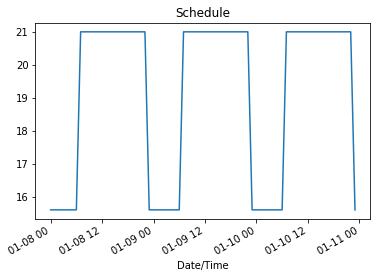

In [44]:
data6[winterperiod[0]:winterperiod[1]].iloc[:,2].plot(title = 'Schedule')

In [45]:
data_env = data1['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)']

<AxesSubplot:title={'center':'invierno'}, xlabel='Date/Time'>

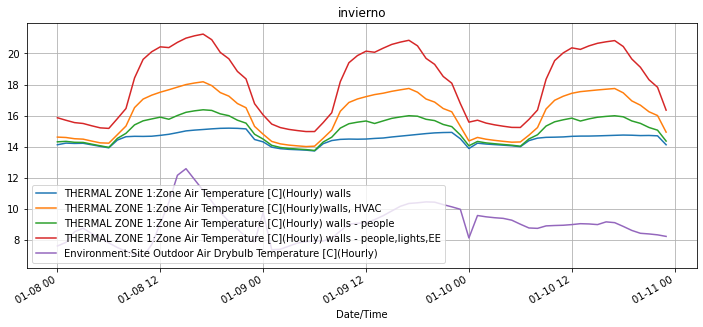

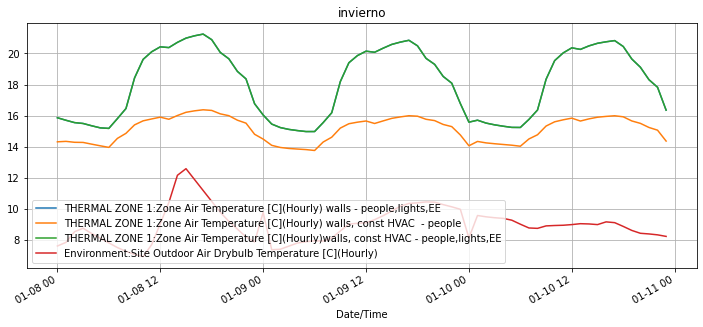

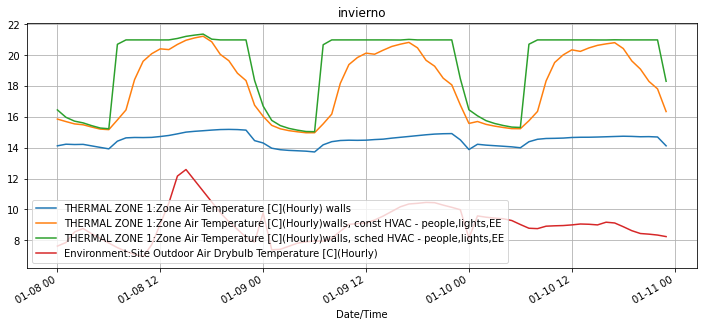

In [81]:
merge_transform_ts(p=winterperiod,
                   data_list=[data1.iloc[:,1],data2.iloc[:,1],data3.iloc[:,1],data3_1.iloc[:,1]],
                   env_data=data_env,titles=[title1,title2,title3,title3_1]
                  ).plot(title = 'invierno',figsize = (12,5),grid =True)
merge_transform_ts(p=winterperiod,
                   data_list=[data3_1.iloc[:,1],data4.iloc[:,1],data5.iloc[:,1]],
                   env_data=data_env,
                   titles=[title3_1,title4,title5]
                  ).plot(title = 'invierno',figsize = (12,5),grid =True)
merge_transform_ts(p=winterperiod,
                   data_list=[data1.iloc[:,1],data5.iloc[:,1],data6.iloc[:,1]],
                   env_data=data_env,titles=[title1,title5,title6] 
                  ).plot(title = 'invierno',figsize = (12,5),grid =True)


<AxesSubplot:title={'center':'verano'}, xlabel='Date/Time'>

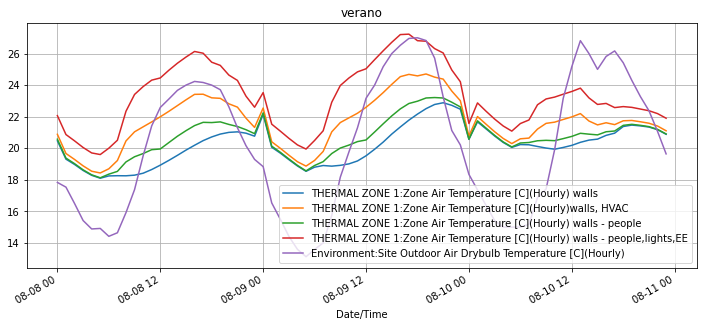

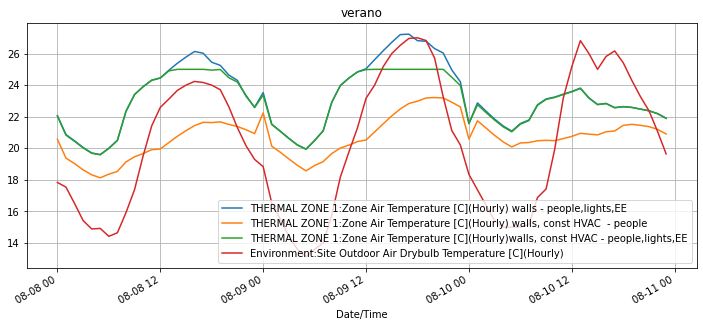

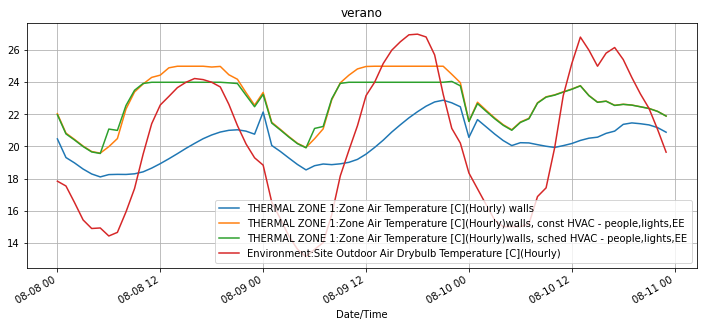

In [82]:
merge_transform_ts(p=summerperiod,
                   data_list=[data1.iloc[:,1],data2.iloc[:,1],data3.iloc[:,1],data3_1.iloc[:,1]],
                   env_data=data_env,titles=[title1,title2,title3,title3_1]
                  ).plot(title = 'verano',figsize = (12,5),grid =True)
merge_transform_ts(p=summerperiod,
                   data_list=[data3_1.iloc[:,1],data4.iloc[:,1],data5.iloc[:,1]],
                   env_data=data_env,
                   titles=[title3_1,title4,title5]
                  ).plot(title = 'verano',figsize = (12,5),grid =True)
merge_transform_ts(p=summerperiod,
                   data_list=[data1.iloc[:,1],data5.iloc[:,1],data6.iloc[:,1]],
                   env_data=data_env,titles=[title1,title5,title6] 
                  ).plot(title = 'verano',figsize = (12,5),grid =True)


#### Comparativa de las distintas variables de temperatura interior disponibles usando el estudio 6

In [85]:
p = winterperiod
datavp = datav[p[0]:p[1]]

<AxesSubplot:xlabel='Date/Time'>

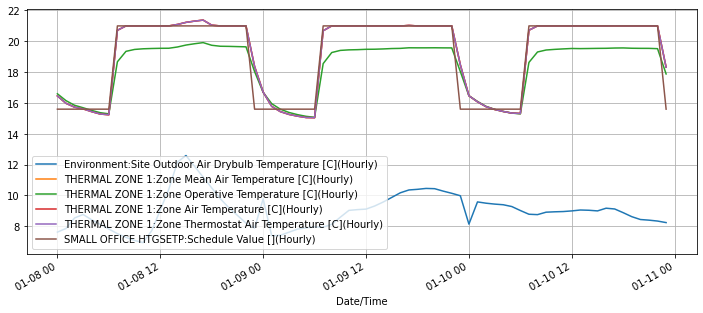

In [86]:
datavp.plot(figsize = (12,5),grid =True)

In [55]:
#solo es distinta Zone Operative Temperature